___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [113]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [114]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [116]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [117]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [118]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [119]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [120]:
# Checking the shape of one image
X_train[3].shape

(28, 28)

In [121]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [122]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

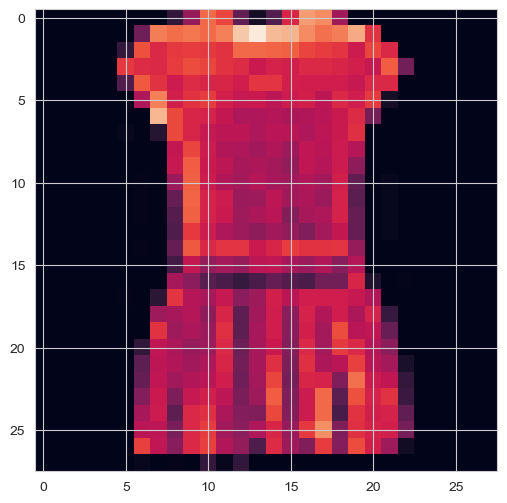

In [123]:
plt.imshow(X_train[3])
plt.show()

In [124]:
y_train[3]

3

In [125]:
classes[y_train[3]]

'Dress'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [126]:
X_train[3].min()

0

In [127]:
X_train[3].max()

255

In [128]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [129]:
X_train[3].min()

0.0

In [130]:
X_train[3].max()

1.0

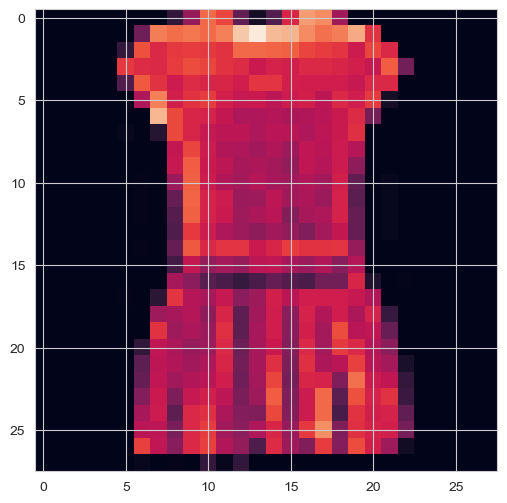

In [131]:
plt.imshow(X_train[3])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [132]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [133]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [112]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [34]:
y_train[0]

9

In [35]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [139]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(28, 28, 1),
        activation="relu",
        padding="same",
    )
)
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu")) # Why 128, this is random but we start with a nominal number and then decrease
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [140]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 48)        12144     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2352)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [141]:
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True)

In [143]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 30s 11ms/step - loss: 0.4036 - accuracy: 0.8548 - val_loss: 0.3390 - val_accuracy: 0.8794
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2652 - accuracy: 0.9049 - val_loss: 0.2796 - val_accuracy: 0.8999
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2292 - accuracy: 0.9179 - val_loss: 0.2589 - val_accuracy: 0.9058
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2085 - accuracy: 0.9243 - val_loss: 0.2654 - val_accuracy: 0.9099
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1957 - accuracy: 0.9301 - val_loss: 0.2590 - val_accuracy: 0.9080
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1848 - accuracy: 0.9326 - val_loss: 0.2682 - val_accuracy: 0.9079
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1789 - accuracy: 0.9364 - val_loss: 0.2792 - 

**TASK 7: Plot values of metrics you used in your model.**

In [144]:
model.metrics_names

['loss', 'accuracy']

In [145]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.404,0.855,0.339,0.879
1,0.265,0.905,0.280,0.900
2,0.229,0.918,0.259,0.906
3,0.208,0.924,0.265,0.910
4,0.196,0.930,0.259,0.908


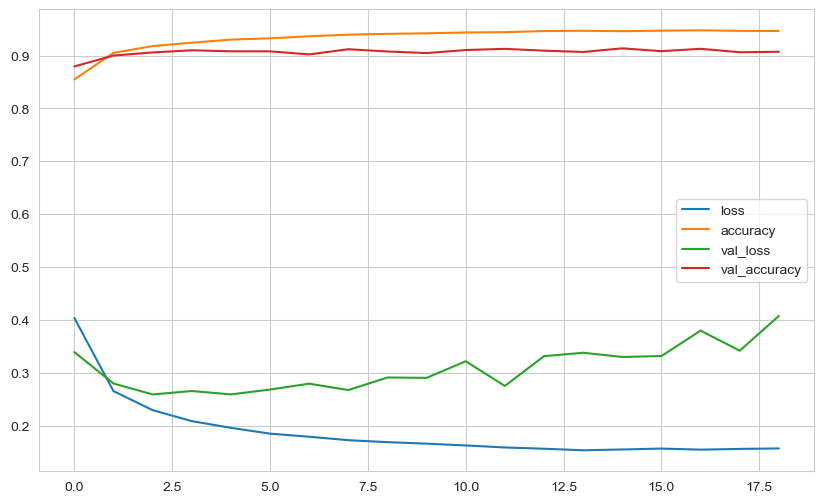

In [146]:
summary.plot();

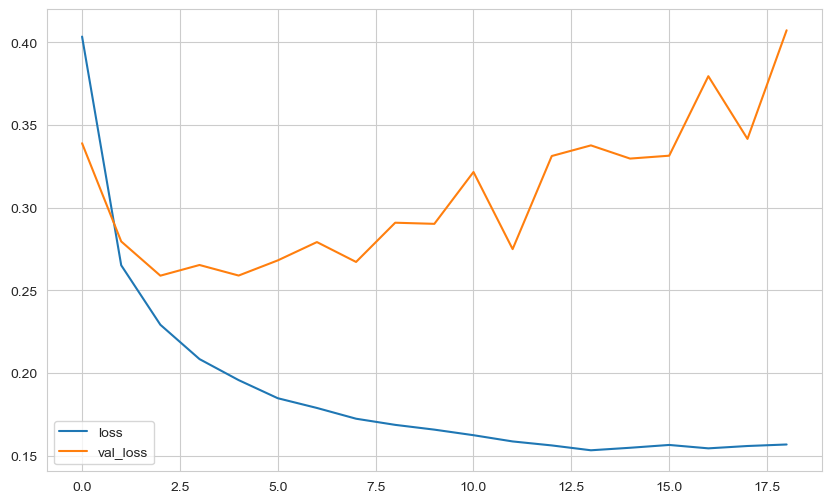

In [147]:
summary[["loss", "val_loss"]].plot();

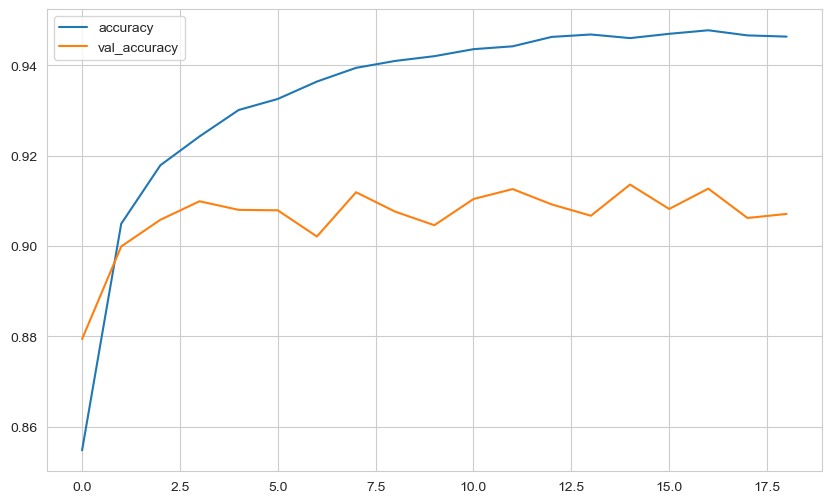

In [148]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [149]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [150]:
# By default 1st=loss, 2nd=accuracy
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3298 - accuracy: 0.9136


[0.32976236939430237, 0.9136000275611877]

In [151]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.32976236939430237
Test accuracy: 0.9136000275611877


In [152]:
# probability matrix
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 4ms/step


array([[3.0311238e-13, 1.7341674e-19, 2.7811734e-15, ..., 6.0316991e-09,
        1.6056360e-12, 1.0000000e+00],
       [2.4513783e-11, 1.6618608e-31, 1.0000000e+00, ..., 7.8524023e-19,
        5.0556799e-18, 1.7533896e-21],
       [2.0496659e-10, 1.0000000e+00, 1.2794899e-12, ..., 5.3242183e-19,
        1.6404191e-14, 5.1387562e-21],
       ...,
       [2.4754973e-14, 9.0742851e-37, 2.8472813e-21, ..., 3.4754074e-16,
        1.0000000e+00, 6.5151718e-31],
       [1.1848588e-09, 1.0000000e+00, 8.9499984e-13, ..., 1.1781358e-14,
        9.2317104e-16, 2.0255971e-14],
       [4.5696960e-04, 1.3128831e-08, 4.1250765e-05, ..., 6.7467082e-01,
        1.4462536e-03, 4.0218638e-05]], dtype=float32)

In [154]:
# predicted results in decimal form
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.85      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [156]:
print(confusion_matrix(y_test, y_pred))

[[885   0  18   8   3   1  83   0   2   0]
 [  3 983   1   7   0   0   5   0   1   0]
 [ 12   1 874   8  49   0  56   0   0   0]
 [ 37   4   6 911  18   0  23   0   1   0]
 [  3   0  68  30 854   0  45   0   0   0]
 [  0   0   0   0   0 972   0  22   0   6]
 [122   1  55  25  61   0 732   0   4   0]
 [  0   0   0   0   0   5   0 986   0   9]
 [  3   0   0   4   4   1   5   2 980   1]
 [  1   0   0   0   0   5   0  35   0 959]]


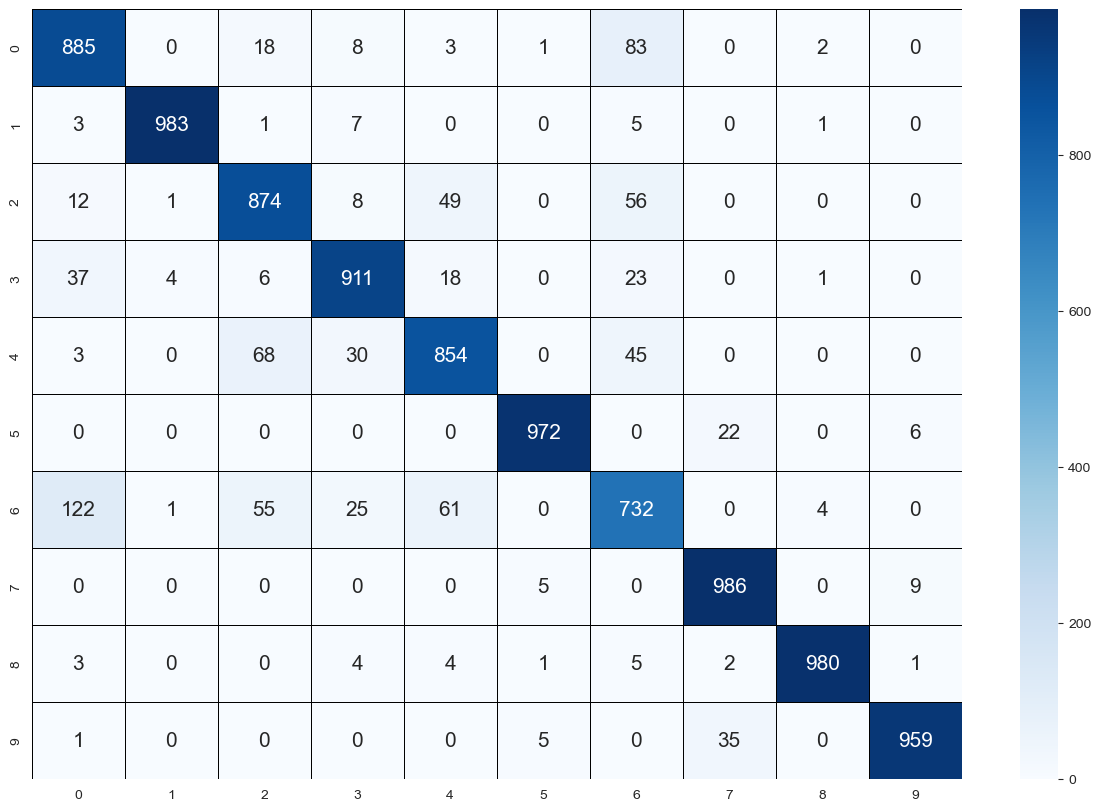

In [157]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [158]:
np.not_equal(y_test, y_pred).sum()

864

In [159]:
np.equal(y_test, y_pred).sum()

9136

## Prediction

In [189]:
my_number = X_test[13]

In [190]:
my_number.shape

(28, 28, 1)

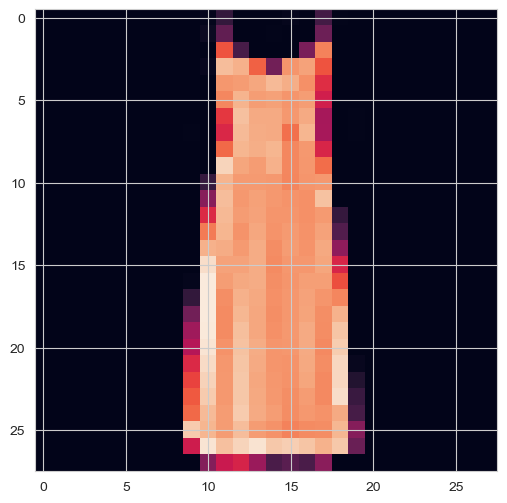

In [191]:
plt.imshow(my_number)
plt.show()

In [192]:
# before prediction we prepare the data. TF keras expects 4 dimension matrix. so we expand and write the number of data points in the beginning
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [193]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 45ms/step


array([[4.0051855e-05, 9.2999315e-08, 9.3629327e-09, 9.9995816e-01,
        7.2125069e-08, 5.1989062e-09, 9.2674787e-07, 4.9910551e-07,
        3.1279994e-09, 1.1713420e-07]], dtype=float32)

In [194]:
y_pred = np.argmax(pred_prob)
y_pred

3

In [200]:
classes[y_test[13]]

'Dress'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___